## 데이터 수집

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
from konlpy.tag import Twitter
from lxml import html
from collections import Counter
from datetime import datetime, timedelta

import pandas as pd
import re
import random
import pytagcloud      # requires Korean font support
import webbrowser
import nltk

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


### 언론사 제목 수집(조선,세계,한겨레)

### URL 입력

In [4]:
urls = []
url = input("url 주소를 입력하세요. \n정치 : http://www.segye.com/newsList/0101010100000?curPage=\n경제 : http://www.segye.com/newsList/0101030100000?curPage=\n사회 : http://www.segye.com/newsList/0101080100000?curPage= \n")
for x in range(1, 1000):
    urls.append('%s%d' % (url, x))

url 주소를 입력하세요. 
정치 : http://www.segye.com/newsList/0101010100000?curPage=
경제 : http://www.segye.com/newsList/0101030100000?curPage=
사회 : http://www.segye.com/newsList/0101080100000?curPage= 
http://www.segye.com/newsList/0101030100000?curPage=


In [5]:
len(urls)

999

In [6]:
urls

['http://www.segye.com/newsList/0101030100000?curPage=1',
 'http://www.segye.com/newsList/0101030100000?curPage=2',
 'http://www.segye.com/newsList/0101030100000?curPage=3',
 'http://www.segye.com/newsList/0101030100000?curPage=4',
 'http://www.segye.com/newsList/0101030100000?curPage=5',
 'http://www.segye.com/newsList/0101030100000?curPage=6',
 'http://www.segye.com/newsList/0101030100000?curPage=7',
 'http://www.segye.com/newsList/0101030100000?curPage=8',
 'http://www.segye.com/newsList/0101030100000?curPage=9',
 'http://www.segye.com/newsList/0101030100000?curPage=10',
 'http://www.segye.com/newsList/0101030100000?curPage=11',
 'http://www.segye.com/newsList/0101030100000?curPage=12',
 'http://www.segye.com/newsList/0101030100000?curPage=13',
 'http://www.segye.com/newsList/0101030100000?curPage=14',
 'http://www.segye.com/newsList/0101030100000?curPage=15',
 'http://www.segye.com/newsList/0101030100000?curPage=16',
 'http://www.segye.com/newsList/0101030100000?curPage=17',
 'http

### 하나의 페이지 테스트

In [7]:
url = urls[0]
html = urlopen(url)
data = BeautifulSoup(html, "lxml")

In [8]:
data

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="세계일보" name="Author"/>
<meta content="세계일보" name="Description"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//img.segye.com/resourcesimages/favicon-segye1.ico" rel="shortcut icon"/>
<link href="//img.segye.com/resources/css/segye2016.css" rel="stylesheet" type="text/css"/>
<title>세상을 보는 눈, 글로벌 미디어 - 세계일보 -</title>
</head>
<!-- Google Tag Manager -->
<body><noscript><iframe height="0" src="//www.googletagmanager.com/ns.html?id=GTM-KDPKKS" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'

In [9]:
data_temp = data.find_all('div', 'newslist_area')

In [10]:
len(data_temp)

1

#### 제목 가져오기

In [11]:
data_title = data_temp[0].find_all('dt', 'title_cr')

In [12]:
data_title[0]

<dt class="title_cr"><a href="/newsView/20181118001744" target="_self">단순노무직 5년 만에 최대폭 감소</a></dt>

In [13]:
data_title[-1]

<dt class="title_cr"><a href="/newsView/20181116002315" target="_self">한국체인스토어협회, 2019년 유통 키워드는'5 Free(프리)'</a></dt>

In [14]:
len(data_title)

20

In [15]:
data_title[0].get_text()

'단순노무직 5년 만에 최대폭 감소'

In [16]:
re.sub('[\'\n\r\t\xa0]', '', data_title[0].get_text())

'단순노무직 5년 만에 최대폭 감소'

#### 날짜 가져오기

In [17]:
data_date = data_temp[0].find_all('span', 'date')

In [18]:
data_date[0]

<span class="date">2018.11.18</span>

In [19]:
data_date[-1]

<span class="date">2018.11.17</span>

In [20]:
len(data_date)

20

In [21]:
data_date[0].get_text()

'2018.11.18'

### 데이터 수집 및 확인

### 언론사(세계)

In [22]:
title = []
date = []
page = 0

start_flag = False
end_flag = False

end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]

print("=" * 50)
print("[%s ~ %s] 데이터 수집을 시작합니다.\n" % (end_date, start_date))

start = datetime.now()

for url in urls:
    html = urlopen(url)
    data = BeautifulSoup(html, "lxml")    
    data_temp = data.find_all('div', 'newslist_area')
    
    # 기사 제목 및 날짜 찾기
    data_title = data_temp[0].find_all('dt', 'title_cr')
    data_date = data_temp[0].find_all('span', 'date')
    
    # 데이터수집 체크
    page += 1
    
    if start_flag:
        print("%d 페이지 수집중입니다.... ing" %page, end='')
    
    for x in range(len(data_title)):
        
        # 기사 끝날 날짜 체크 (end_flag 변경)
        if data_date[x].get_text() in end_date:
            temp_date = data_date[x].get_text()
            end_flag = True

        # 기사 끝날 날짜 체크(반복문 out)    
        if end_flag:
            if not(temp_date == data_date[x].get_text()):
                break       
        
        
        if not(start_flag):            
            # 기사 시작 날짜 체크
            if not(data_date[x].get_text() in start_date):            
                continue
            print("%d 페이지 수집중입니다.... ing" %page, end='')
            start_flag = True
        
  
        
        # 기사 제목만 가져오기
        title.append(re.sub('[\'\n\r\t\xa0]', '', data_title[x].get_text()))
   
        # 기사 날짜만 가져오기
        date.append(data_date[x].get_text())
        

    # 데이터 수집 시작 체크
    if not(start_flag):
        continue
        
    # 데이터수집 체크
    print("     [수집완료]")       
          
    
    # 기사 끝날 날짜 체크(반복문 out)  
    if end_flag:
        if not(temp_date == data_date[x].get_text()):
            break 

        
end = datetime.now()
print("=" * 50)
print("데이터 수집을 완료했습니다.")
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
print('총 수집 개수: %d개' %len(title))

시작 날짜를 입력하세요.  ex) 20181007 
20181115
마지막 날짜를 입력하세요.  ex) 20181115 
20181118
[2018.11.15 ~ 2018.11.18] 데이터 수집을 시작합니다.

1 페이지 수집중입니다.... ing     [수집완료]
2 페이지 수집중입니다.... ing     [수집완료]
3 페이지 수집중입니다.... ing     [수집완료]
4 페이지 수집중입니다.... ing     [수집완료]
5 페이지 수집중입니다.... ing     [수집완료]
데이터 수집을 완료했습니다.
총 계산 시간: 0:00:02.477141
총 수집 개수: 89개


In [23]:
len(title)

89

In [24]:
len(date)

89

In [25]:
title[0]

'단순노무직 5년 만에 최대폭 감소'

In [26]:
date[0]

'2018.11.18'

In [27]:
title[-1]

'‘계열사 고의 누락’ 이건희 회장 고발'

In [28]:
date[-1]

'2018.11.15'

### DataFrame 만들기 & 파일로 저장하기

In [29]:
df_temp = {'Title' : title, 'Date' : date}
df = pd.DataFrame(df_temp)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
Title    89 non-null object
Date     89 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [31]:
df.head(10)

,Title,Date
0,단순노무직 5년 만에 최대폭 감소,2018.11.18
1,"BBQ, 치킨값 19일 인상…황금올리브 등 2000원 올라",2018.11.18
2,"첫 업종별 사회적대화, 금융산업위원회 발족",2018.11.18
3,BBQ 윤학종 대표 돌연 사임…지난해 이어 CEO 줄사임,2018.11.18
4,화장품업체들 3분기에도 ‘실적 충격’,2018.11.18
5,"최저기온 영하로 뚝, 겨울추위 본격 시작…보일러관리 4가지 Tip [이슈탐색]",2018.11.18
6,"나 혼자 사는 1인가구, 내 몸은 내가 지킨다 [김현주의 일상 톡톡]",2018.11.18
7,한국 산업용 로봇활용 세계 1위…“일자리와 보완 관계 가능”,2018.11.17
8,반전없는 고용부진…친기업 행보 속도낼까,2018.11.17
9,저출산 속에도 육아 전담 남편수 12개월 연속 늘었다,2018.11.17


In [32]:
df.tail(10)

,Title,Date
79,"9·13대책 발표 두 달…""2억∼3억원 내려도 집 안 팔려""",2018.11.15
80,"""관세는 내렸는데…수입 초콜릿·고가 맥주 가격은 오히려 올라""",2018.11.15
81,㈜한라 천진법인 청산에 따른 243억원 투자금 회수,2018.11.15
82,"오티스, 2018 한국국제승강기엑스포서 차세대 혁신기술 선보여",2018.11.15
83,"도공, 내년 2월부터 고속도로 모든 휴게공간에 무료 와이파이서비스 제공",2018.11.15
84,"코레일, 국내 유일‘철도교통 관제교육 기관’ 지정 박차",2018.11.15
85,"일본 농림어업신용보증기금, 한국 농신보 포항센터 방문",2018.11.15
86,"이베이코리아·우정사업본부, 소상공인·지역경제 활성화 위한 업무협약 체결",2018.11.15
87,[이코노 브리핑] KB금융 대국민안전문화확산 MOU 외,2018.11.15
88,‘계열사 고의 누락’ 이건희 회장 고발,2018.11.15


### 결과 저장하기(주석 처리)

In [33]:
# Thema = input("주제를 입력하세요.  ex) society \n")
# df.to_csv('TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='UTF-8')

## 기사 단어 뽑기

### 저장된 데이터 가져오기

In [30]:
check = input("언론사 데이터를 가져오려면 : 1 \n국민청원 데이터를 가져오려면 : 2\n")

if check == "1":
    Thema = input("주제를 입력하세요.  ex) society \n")
    end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
    start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
    choose = input("제목만 가져오려면 : 1\n본문까지 가져오려면 : 2 \n")
    end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
    start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]
else:
    thema = input("청원 분야를 입력하세요.\n- 일교/통일/국방 : 36 \n- 일자리 : 37 \n- 인권/성평등 : 49 \n")
    day = input("진행 중 청원 : 1, 만료된 청원 : 2 \n")
    end_date = input("시작 날짜를 입력하세요.  ex) 181007 \n")
    start_date = input("마지막 날짜를 입력하세요.  ex) 181115 \n")
    end_date = end_date[:2] + '.' + end_date[2:4] + '.' + end_date[4:]
    start_date = start_date[:2] + '.' + start_date[2:4] + '.' + start_date[4:]

언론사 데이터를 가져오려면 : 1 
국민청원 데이터를 가져오려면 : 2
2
청원 분야를 입력하세요.
- 일교/통일/국방 : 36 
- 일자리 : 37 
- 인권/성평등 : 49 
36
진행 중 청원 : 1, 만료된 청원 : 2 
1
시작 날짜를 입력하세요.  ex) 181007 
180101
마지막 날짜를 입력하세요.  ex) 181115 
181116


In [31]:
if check == "1":
    if choose == '1':
        word = pd.read_csv('./TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
    else:
        word = pd.read_csv('./TeamMission/segye_%s_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
else:
    word = pd.read_csv('./TeamMission/president_%s_%s_(%s - %s).csv' % (thema, day, end_date, start_date), sep=',', encoding='utf-8')

del word['Unnamed: 0']

In [32]:
word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 3 columns):
Title    2427 non-null object
Date     2427 non-null object
count    2427 non-null object
dtypes: object(3)
memory usage: 57.0+ KB


In [33]:
word.head(10)

,Title,Date,count
0,여자도 군대를 가야합니다.,18.11.16,4명
1,남녀차별법을 강화해주세요,18.11.16,1명
2,‘묻지마 폭행’이라며 지나쳐온 많은 범죄의 혐오성을 인정해주십시오.,18.11.16,4명
3,이제 '남성'들도 국가에 요구합니다,18.11.16,345명
4,양구 전방초소 사건 진상규명 촉구,18.11.16,21명
5,"중증장애인 가족 ""장애인활동지원서비스"" 허용 해 주십시오.",18.11.16,4명
6,군대)강원도 양구 GP서 총기사고,18.11.16,11명
7,"문대통령님, 조선일보 사장가족의 갑질행위 적폐중의 적폐입니다.",18.11.16,5명
8,이수역 사건 두 자매를 처벌해주세요,18.11.16,77명
9,여성들 국방세도입 해서 성평등 실현해주세요,18.11.16,9명


In [34]:
word.tail(10)

,Title,Date,count
2417,"워마드들이 올린 피시방살인 사건글, 워마드를 포함한 모든 꼴페미 사이트 정지를 청원...",18.10.19,4명
2418,군대내 도서관을 만들어 주세요,18.10.19,4명
2419,cj 택배 폭행사건을 통해 장애인 인권 문제를 해결해주세요!!,18.10.19,33명
2420,고 노무현 대통령님을 욕보이는 일베사이트의 폐쇄와 게시자 처벌을 강력히 청원합니다.,18.10.19,20명
2421,CJ대한통운 장애인폭행 큰처벌을 내려주세요.,18.10.19,"2,198명"
2422,[제발 한번만 봐주세요]경찰에게 보호받는 시민이 되도록 도와주세요,18.10.19,19명
2423,학교 교복중 마이 위에 사복 못입게 하지말아주세요.,18.10.19,8명
2424,"저와 저의 아버지가 경찰관에게 무시,조롱당하지 않게 도와주세요.",18.10.19,26명
2425,너무 화가 납니다,18.10.19,16명
2426,제주도 성폭행 혐의 조합장 관련 입점업체 여직원의 거짓된 미투운동,18.10.19,8명


In [35]:
len(word)

2427

#### DataFrame -> List -> String

In [36]:
words = str()

start = datetime.now()

if check == '1':
    if choose == '1':
        for i in range(len(list(word['Title']))):
            words += str(list(word['Title'])[i])
    else:
        for i in range(len(list(word['News']))):
            words += str(list(word['News'])[i])
else:
    for i in range(len(list(word['Title']))):
        words += str(list(word['Title'])[i])

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

총 계산 시간: 0:00:00.248014


In [37]:
words[:1000]

'여자도 군대를 가야합니다.남녀차별법을 강화해주세요‘묻지마 폭행’이라며 지나쳐온 많은 범죄의 혐오성을 인정해주십시오.이제 \'남성\'들도 국가에 요구합니다양구 전방초소 사건 진상규명 촉구중증장애인 가족 "장애인활동지원서비스" 허용 해 주십시오.군대)강원도 양구 GP서 총기사고문대통령님, 조선일보 사장가족의 갑질행위 적폐중의 적폐입니다.이수역 사건 두 자매를 처벌해주세요여성들 국방세도입 해서 성평등 실현해주세요문제인 대통령님,제발 양성 갈등을 막아주세요.야 머꼴 히토미 달린다181116_궁금한이야기Y에 나온 불법촬영 및 강간 협박한 최군 신상 공개및 처벌 을 청원합니다이수역 성희롱 가해자 여성 처벌해주세요!담배는 왜? 판매 하나요?문재인 대통령님,제발 우리나라가 증오의 구렁텅이로 빠지지 않게 해주세요산이 노래를 듣고 얼마나 남성들이 역차별받고 살았는지 깨달았습니다청와대 청원계시판에 글올린후 3천배나 더 괴롭힙니다TJ 미디어에 패션시티 수록되게 해주세요소방관부부 5세 딸 치어 숨지게 한 40대 항소양진호 갑질은 갑질 축에도 못듭니다 북부서 김용섭 경장(04년당시) 의 갑질을 조사하여 주십시요이수역 성희롱 사건의 진상규명 요청부산조폭의 사이버범죄 및 명예훼손조폭의교사살인, 혐의없음. 재조사할것문재인 대통령님,제발 우리나라가 증오의 구렁텅이로 빠지지 않게 해주세요조폭의교사살인, 혐의없음. 재조사할것유투유투조폭의교사살인, 혐의없음. 재조사할것수사관 검사 판사의 조직적은 증거조작에 의한 억을한 판결에 대하여 재심을 받게 해 주세요조폭의교사살인, 혐의없음. 재조사할것남녀 성 갈등을 유발하는 메갈, 워마드, 일베 등 특정 사이트를 불법으로 지정해주세요조폭의교사살인, 혐의없음. 재조사할것너무 여자들만의 얘기를 들어주니 남자들이 괜한 피해자가 되는 사례가 많이 있네요.조폭의교사살인, 혐의없음. 재조사할것이수역주점  남성혐호사건조폭의교사살인, 혐의없음. 재조사할것디지털 성범죄 근절을 하기 위하여 미투 입법이 필요한 이유가 무엇입니까?여러분 ~ 이수역사건 여자가 자백햇답니다~우리 

In [38]:
len(words)

58625

#### 트위터로 단어 뽑기

In [39]:
start = datetime.now()

twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

C:\python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 계산 시간: 0:00:09.778559


#### 단어 분류

In [40]:
one_words = []
two_words = []
etc_words = []

for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

(1735, 8557, 2688)

In [41]:
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

len(one_words), len(two_words), len(etc_words)

(292, 1988, 822)

In [42]:
for word in one_words:
    print(word, end='\t')

생	햇	쉬	란	제	괜	양	몸	밤	집	달	진	준	샆	혼	앗	과	통	날	분	척	너	김	음	퇴	증	혐	전	를	간	햐	끝	소	도	민	똑	합	앞	뭡	손	율	못	물	토	때	용	남	행	부	청	옥	엄	릉	값	뭘	죄	터	감	휘	꼴	퍼	표	산	저	니	항	그	월	링	순	옷	종	업	술	패	주	딸	을	병	질	닝	삶	쇼	궁	관	군	발	최	해	캣	풀	버	씨	알	팔	칼	역	선	겨	현	예	규	거	귀	나	퀄	더	칸	찰	뇌	곧	힘	꺄	피	님	볼	밎	폐	콜	린	넛	긘	붕	상	말	및	문	초	밖	충	무	윗	깨	적	공	메	네	억	은	논	묘	세	습	함	난	낮	향	배	누	직	심	건	살	싹	일	죽	틀	실	회	겁	떄	인	바	폰	신	내	약	휜	성	스	뒤	첫	혁	점	별	촌	구	속	잔	설	안	조	장	후	입	이	비	읍	료	눈	놈	정	몇	녀	임	금	유	탈	타	글	게	여	꼭	갑	범	불	자	답	빽	위	두	좀	둘	시	돈	황	개	애	계	법	노	등	모	괴	번	중	층	맘	수	검	년	품	뜻	곡	석	워	의	재	팀	채	쥐	왜	식	머	외	방	경	온	욕	복	밥	톡	축	곳	처	걸	것	반	차	트	악	젠	막	친	쌔	넋	셋	고	형	찬	줄	땅	뭐	앱	박	벌	면	호	폭	명	사	새	캔	또	만	책	치	늘	로	편	익	평	

#### stop_words 생성

In [43]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['알림','소식', '궂긴', '기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','인천','수원','용인','대전','대구','부산','울산','광주','제주','제주도']

stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
stop_words.extend(one_words)

#### stop_words 빼기

In [44]:
nouns = [word for word in nouns3 if word not in stop_words]
len(nouns)

10858

In [45]:
common_word2 = Counter(nouns)

In [46]:
common_word2 = common_word2.most_common()

In [47]:
wordname = []
wordfreq = []

for i in range(len(common_word2)):
    wordname.append(common_word2[i][0])
    wordfreq.append(common_word2[i][1])
    
    ecolist = pd.DataFrame({'단어명' : wordname, '빈도수':wordfreq})

In [48]:
ecolist.head()

,단어명,빈도수
0,사건,321
1,처벌,316
2,살인,200
3,청원,157
4,폭행,148


#### stop_word 실행한 데이터 저장

In [21]:
if check == "1":
    if choose == "1":
        ecolist.to_csv('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
        print('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (Thema, end_date, start_date))
    else:
        ecolist.to_csv('./TeamMission/segye_%s_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
        print('./TeamMission/segye_%s_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (Thema, end_date, start_date))
else:
    ecolist.to_csv('TeamMission/president_%s_%s_word_utf_(%s - %s).csv'% (thema, day, end_date, start_date), sep=',', encoding='utf-8')
    print('TeamMission/president_%s_%s_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (thema, day, end_date, start_date))
    

TeamMission/president_49_1_word_utf_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.


#### 워드클라우드 만들기

In [22]:
token = nltk.Text(nouns, name='기사')
type(token), len(token)

(nltk.text.Text, 10856)

In [23]:
token.vocab().most_common(30)

[('사건', 321),
 ('처벌', 315),
 ('살인', 200),
 ('청원', 157),
 ('폭행', 148),
 ('이수역', 138),
 ('강서구', 108),
 ('인권', 107),
 ('여성', 87),
 ('폐지', 86),
 ('국민', 79),
 ('대한', 70),
 ('피해자', 68),
 ('미약', 64),
 ('요청', 63),
 ('심신', 61),
 ('남성', 59),
 ('사형제', 57),
 ('사람', 55),
 ('양심', 54),
 ('관련', 53),
 ('가해자', 51),
 ('수사', 50),
 ('사형', 46),
 ('부활', 46),
 ('범죄', 45),
 ('강력', 44),
 ('경찰', 44),
 ('강화', 43),
 ('조사', 43)]

#### 워드클라우드 한글폰트 설정

In [24]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [25]:
data = token.vocab().most_common(1000)
len(data)

1000

In [26]:
data[:10]

[('사건', 321),
 ('처벌', 315),
 ('살인', 200),
 ('청원', 157),
 ('폭행', 148),
 ('이수역', 138),
 ('강서구', 108),
 ('인권', 107),
 ('여성', 87),
 ('폐지', 86)]

#### data를 딕셔너리 형태로 변환

In [27]:
dict_data = dict(data)
len(dict_data)

1000

#### 워드클라우드 그리기

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

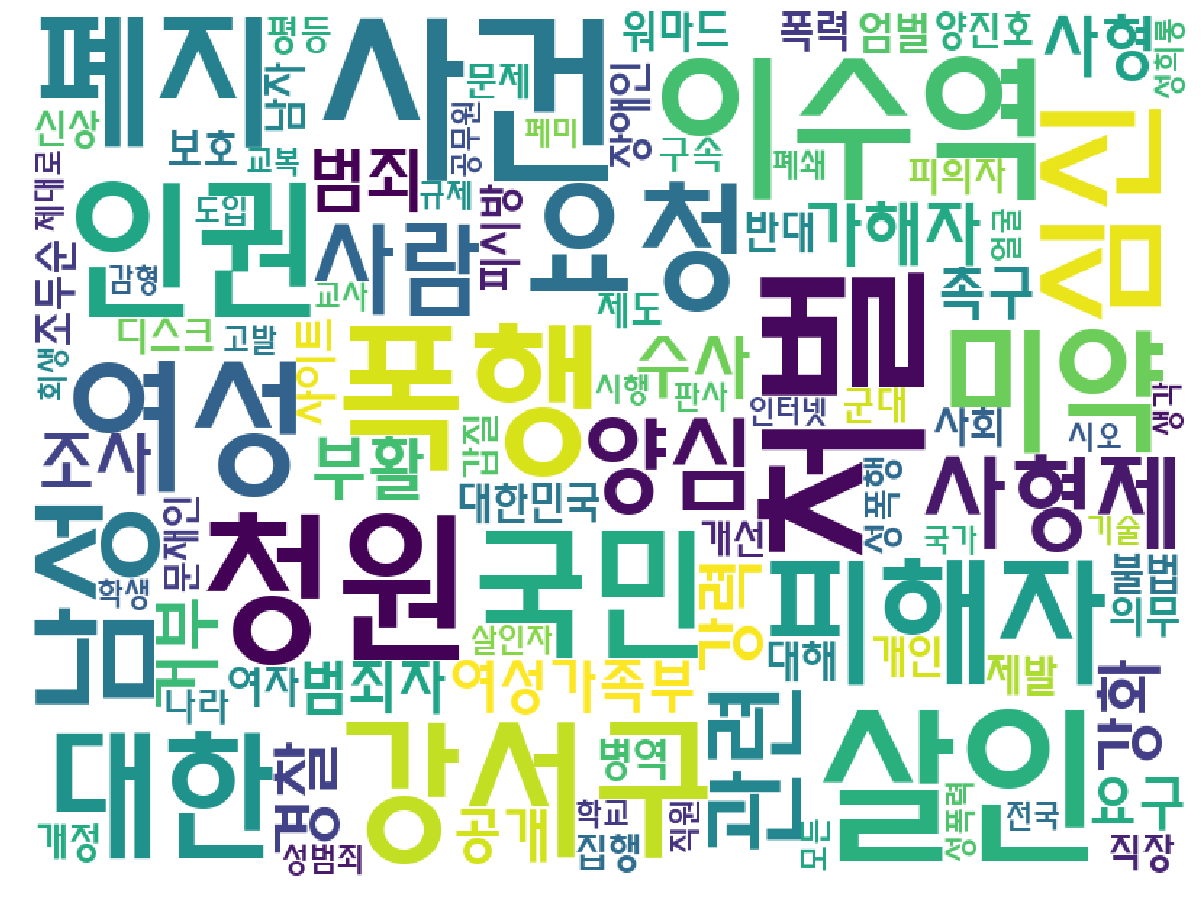

In [29]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
#     "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

if check == '1':
    if choose == '1':
        save_img = 'images/segye_%s_title_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
    else:
        save_img = 'images/segye_%s_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
else:
    save_img = 'images/president_%s_%s_(%s - %s).png' % (thema, day, end_date, start_date)
    
plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

### 주제별 word 합치기

#### 데이터 읽어오기

In [95]:
president_36_1 = pd.read_csv('./TeamMission/president_36_1_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_36_2 = pd.read_csv('./TeamMission/president_36_2_(18.01.01 - 18.10.17).csv', sep=(','), encoding='utf-8')
president_37_1 = pd.read_csv('./TeamMission/president_37_1_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_37_2 = pd.read_csv('TeamMission/president_37_2_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_49_1 = pd.read_csv('./TeamMission/president_49_1_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_49_2 = pd.read_csv('TeamMission/president_49_2_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')

In [96]:
president_36_1.head()

,Unnamed: 0,Title,Date,count
0,0,여자도 군대를 가야합니다.,18.11.16,4명
1,1,남녀차별법을 강화해주세요,18.11.16,1명
2,2,‘묻지마 폭행’이라며 지나쳐온 많은 범죄의 혐오성을 인정해주십시오.,18.11.16,4명
3,3,이제 '남성'들도 국가에 요구합니다,18.11.16,345명
4,4,양구 전방초소 사건 진상규명 촉구,18.11.16,21명


#### 불필요한 열 제거

In [97]:
president_36_1.drop('Unnamed: 0',axis=1, inplace=True)
president_36_2.drop('Unnamed: 0',axis=1, inplace=True)
president_37_1.drop('Unnamed: 0',axis=1, inplace=True)
president_37_2.drop('Unnamed: 0',axis=1, inplace=True)
president_49_1.drop('Unnamed: 0',axis=1, inplace=True)
president_49_2.drop('Unnamed: 0',axis=1, inplace=True)

In [98]:
president_36_1.head()

,Title,Date,count
0,여자도 군대를 가야합니다.,18.11.16,4명
1,남녀차별법을 강화해주세요,18.11.16,1명
2,‘묻지마 폭행’이라며 지나쳐온 많은 범죄의 혐오성을 인정해주십시오.,18.11.16,4명
3,이제 '남성'들도 국가에 요구합니다,18.11.16,345명
4,양구 전방초소 사건 진상규명 촉구,18.11.16,21명


In [99]:
len(president_36_1), len(president_36_2)

(2427, 18222)

In [101]:
len(president_37_1), len(president_37_2)

(1708, 15820)

In [100]:
len(president_49_1), len(president_49_2)

(2426, 20582)

#### 데이터 합치기

In [102]:
president_36_3 = pd.concat([president_36_1, president_36_2])
president_37_3 = pd.concat([president_37_1, president_37_2])
president_49_3 = pd.concat([president_49_1, president_49_2])

In [61]:
president_36_3.head()

,Title,Date,count
0,여자도 군대를 가야합니다.,18.11.16,4명
1,남녀차별법을 강화해주세요,18.11.16,1명
2,‘묻지마 폭행’이라며 지나쳐온 많은 범죄의 혐오성을 인정해주십시오.,18.11.16,4명
3,이제 '남성'들도 국가에 요구합니다,18.11.16,345명
4,양구 전방초소 사건 진상규명 촉구,18.11.16,21명


In [106]:
president_49_3.info

<bound method DataFrame.info of                                                    Title      Date    count
0                                         여자도 군대를 가야합니다.  18.11.16       5명
1                                          남녀차별법을 강화해주세요  18.11.16       1명
2                  ‘묻지마 폭행’이라며 지나쳐온 많은 범죄의 혐오성을 인정해주십시오.  18.11.16       5명
3                                    이제 '남성'들도 국가에 요구합니다  18.11.16     484명
4                                     양구 전방초소 사건 진상규명 촉구  18.11.16      37명
5                       중증장애인 가족 "장애인활동지원서비스" 허용 해 주십시오.  18.11.16       5명
6                                     군대)강원도 양구 GP서 총기사고  18.11.16      17명
7                     문대통령님, 조선일보 사장가족의 갑질행위 적폐중의 적폐입니다.  18.11.16       5명
8                                    이수역 사건 두 자매를 처벌해주세요  18.11.16      89명
9                                여성들 국방세도입 해서 성평등 실현해주세요  18.11.16       9명
10                             문제인 대통령님,제발 양성 갈등을 막아주세요.  18.11.16       4명
11                                          야 머꼴 히토미 달린다

In [103]:
len(president_36_3), len(president_37_3), len(president_49_3)

(20649, 17528, 23008)

In [104]:
int(list(president_36_3['count'])[0][:-1].replace(',', ''))

4

#### 청원 참여인원 합계 구하기

In [108]:
sum_count_36 = 0
sum_count_37 = 0
sum_count_49 = 0

for x in range(len(president_36_3)):
    sum_count_36 += int(list(president_36_3['count'])[x][:-1].replace(',', ''))
    
for x in range(len(president_37_3)):
    sum_count_37 += int(list(president_37_3['count'])[x][:-1].replace(',', ''))
    
for x in range(len(president_49_3)):
    sum_count_49 += int(list(president_49_3['count'])[x][:-1].replace(',', ''))  
    

In [109]:
sum_count_36, sum_count_37, sum_count_49

(4982608, 734631, 9309439)

## 뒤에 현재 진행중인 부분

TOP3 주제별 주요 키워드 검색을 통한 감성분석(네이버 데이터렙 활용)
- 형태소 분석 시 나온 키워드를 통한 남/녀별 감성(긍정/부정) 분석
- 주제별 청원 수(글 수 + 참여인원 수) 를 통한 중간평가 점수 정량화
- 기타 과제별 목표와 현재 달성현황 데이터 수집 및 점수화 반영 가능 여부 판단 등